In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
from pickle import load
import pickle

In [3]:
pt.convert_pressure_to_depth(P_kbar=2.4*2, crust_dens_kgm3=2700)

0    18.122098
dtype: float64

In [4]:
with open(r'../Combo_Cpx.pkl', 'rb') as f:
            All_Cpx=load(f)
Lassen_Cpx=All_Cpx.loc[All_Cpx['Volcano']=="Lassen"]
Lassen_Cpx['Sample_ID_Cpx']="Lassen"

C:\Users\penny\AppData\Local\Temp\ipykernel_6896\4214620159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lassen_Cpx['Sample_ID_Cpx']="Lassen"


In [5]:
WangCopy=Lassen_Cpx.copy()
WangCopy['Preferred_P']=WangCopy['P_Wang21_eq1']
WangCopy['Model']="Wang"
JorgensonCopy=Lassen_Cpx.copy()
JorgensonCopy['Preferred_P']=JorgensonCopy['P_Jorgenson22']
JorgensonCopy['Model']="Jorgenson"

Combo_Cpx=pd.concat([WangCopy, JorgensonCopy], axis=0)

In [6]:
Combo_Cpx['Stage'].fillna(0)

0      Lassen domefield
1      Lassen domefield
2      Lassen domefield
3      Lassen domefield
4      Lassen domefield
             ...       
530    Brokeoff Volcano
531    Brokeoff Volcano
532    Brokeoff Volcano
533    Brokeoff Volcano
534    Brokeoff Volcano
Name: Stage, Length: 1070, dtype: object

In [7]:
len(WangCopy.loc[WangCopy['Stage']=='Lassen domefield'])

352

In [8]:
len(WangCopy.loc[WangCopy['Stage']=='Brokeoff Volcano'])

169

## Choose Crustal density

In [9]:
rho=2700
P_axis_min=-3
P_axis_max=12
D_axis_min=100000*P_axis_min/(9.8*rho)
D_axis_max=100000*P_axis_max/(9.8*rho)


In [10]:
Combo_Cpx

,P_Wang21_eq1,T_Wang21_eq2,T_Jorgenson22,P_Jorgenson22,T_Petrelli20,T_Petrelli21_H2O,P_Petrelli21_H2O,T_Put_Teq32d_Peq32a,T_Put_Teq32d_Peq32b,P_Petrelli20,...,SampleID,Total,NiO,Stage,test_total,Unnamed: 16,Phase,Preferred_P,Preferred_P2,Model
0,0.677287,1434.458145,1329.040547,2.823900,1324.683333,1402.743333,1.860804,1438.496515,1437.474180,2.714573,...,NaN,NaN,NaN,Lassen domefield,NaN,NaN,Cpx,0.677287,2.823900,Wang
1,1.244915,1443.540117,1350.169900,3.340963,1349.587778,1401.032222,2.096116,1442.276173,1436.577128,2.769631,...,NaN,NaN,NaN,Lassen domefield,NaN,NaN,Cpx,1.244915,3.340963,Wang
2,0.223460,1431.481353,1346.473383,4.022142,1335.161111,1412.780000,2.397671,1431.378756,1441.051560,4.750200,...,NaN,NaN,NaN,Lassen domefield,NaN,NaN,Cpx,0.223460,4.022142,Wang
3,2.198075,1463.808336,1390.975871,4.517393,1391.898889,1443.112222,1.921129,1456.240759,1454.546395,2.934562,...,NaN,NaN,NaN,Lassen domefield,NaN,NaN,Cpx,2.198075,4.517393,Wang
4,1.619959,1451.013175,1359.219652,3.858771,1360.410000,1416.405556,2.193882,1450.186704,1447.099054,3.260260,...,NaN,NaN,NaN,Lassen domefield,NaN,NaN,Cpx,1.619959,3.858771,Wang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,0.969567,1402.111947,1309.747015,1.091801,1295.976667,1360.583333,2.310578,1416.138548,1426.553888,2.156222,...,NaN,NaN,NaN,Brokeoff Volcano,NaN,NaN,Cpx,1.091801,1.091801,Jorgenson
531,0.755831,1407.543881,1319.035572,1.477022,1346.521111,1388.663333,4.228698,1419.109442,1416.167861,3.828724,...,NaN,NaN,NaN,Brokeoff Volcano,NaN,NaN,Cpx,1.477022,1.477022,Jorgenson
532,1.037630,1407.888263,1321.761940,1.163547,1319.730000,1385.047778,1.484804,1423.422639,1431.834252,1.920138,...,NaN,NaN,NaN,Brokeoff Volcano,NaN,NaN,Cpx,1.163547,1.163547,Jorgenson
533,1.724274,1379.754094,1296.697264,2.958644,1304.331111,1345.444444,4.446664,1421.056191,1414.292356,3.338393,...,NaN,NaN,NaN,Brokeoff Volcano,NaN,NaN,Cpx,2.958644,2.958644,Jorgenson


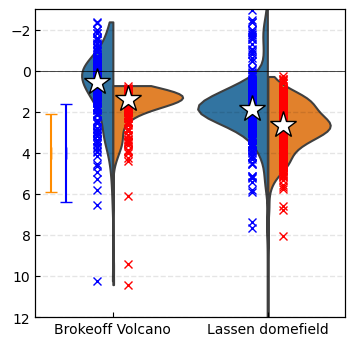

In [28]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(4,4), sharey=True)
ax2 = ax1.twinx()
# ticks = [40.540139,41.3099, 41.6108, 42.9446, 43.7221, 44.103449, 44.6743, 45.3736, 46.1914, 46.8523, 48.1119, 48.7767]
# labels = ['Lassen', 'Shasta', 'Med Lake', 'Crater Lake', 'Newberry', '3 Sisters', 'Mt. Jeff', 'Mt. Hood', 'MSH', 'Rainier', 'Glac. Pk.', 'Mt. Baker']
# ax2.set_xticks(ticks, minor=False)
# ax2.set_xticklabels(labels, fontdict=None, minor=False, rotation=90)
#ax1.set_xlim([40, 49])
volc_order=["Brokeoff Volcano", "Lassen domefield"]
sns.violinplot(x="Stage", y="Preferred_P",  cut=0,  inner=None, hue="Model",
            data=Combo_Cpx, split=True, ax=ax1, width=0.9, order=volc_order, stick=True)

ax1.plot(-0.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Stage"]=="Brokeoff Volcano")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Stage"]=="Brokeoff Volcano")],  
         'xb')

ax1.plot(0.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Stage"]=="Brokeoff Volcano")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Stage"]=="Brokeoff Volcano")],  
         'xr')

ax1.plot(-0.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Stage"]=="Brokeoff Volcano")]),  
         '*k', mfc='w', ms=20)

ax1.plot(0.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Stage"]=="Brokeoff Volcano")]),  
         '*k', mfc='w', ms=20)

ax1.plot(0.9+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Stage"]=="Lassen domefield")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Stage"]=="Lassen domefield")],  
         'xb')

ax1.plot(1.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Stage"]=="Lassen domefield")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Stage"]=="Lassen domefield")],  
         'xr')

ax1.plot(0.9,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Stage"]=="Lassen domefield")]),  
         '*k', mfc='w', ms=20)

ax1.plot(1.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Stage"]=="Lassen domefield")]),  
         '*k', mfc='w', ms=20)

ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.5, 1.5])
ax1.get_legend().remove()
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
ax2.set_yticks([])

ax1.errorbar(-0.3, 4, xerr=0, yerr=2.4,  ecolor='blue', elinewidth=1.5, fmt='none', capsize=4, mec='k')
ax1.errorbar(-0.4, 4, xerr=0, yerr=1.9,  ecolor='darkorange', elinewidth=1.5, fmt='none', capsize=4, mec='k')
fig.savefig('Lassen_Cpx.png', dpi=200)

## Jorgenson pressures

In [ ]:
print('Median Brokeoff')
print(np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Stage"]=="Brokeoff Volcano")]))
print('Mean+ sigma Brokeoff')
print(np.nanmean(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Stage"]=="Brokeoff Volcano")])-np.nanstd(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Stage"]=="Brokeoff Volcano")]))
print('Mean - sigma brokeoff')
print(np.nanmean(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Stage"]=="Brokeoff Volcano")])-np.nanstd(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Stage"]=="Brokeoff Volcano")]))

print('Median domefield')
print(np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Stage"]=="Lassen domefield")]))

print('Mean +sigma domefield')
print(np.nanmean(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Stage"]=="Lassen domefield")])+np.nanstd(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Stage"]=="Lassen domefield")]))

print('Mean - sigma domefield')

print(np.nanmean(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Stage"]=="Lassen domefield")])-np.nanstd(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Stage"]=="Lassen domefield")]))

Median Brokeoff
1.3680870646766166
Mean+ sigma Brokeoff
0.5469812364827404
Mean - sigma brokeoff
0.5469812364827404
Median domefield
2.6448395522388055
Mean +sigma domefield
4.108492429293202
Mean - sigma domefield
1.4008887754783932


In [ ]:
print('Median Brokeoff')
print(np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Stage"]=="Brokeoff Volcano")]))
print('Mean+ sigma Brokeoff')
print(np.nanmean(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Stage"]=="Brokeoff Volcano")])+np.nanstd(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Stage"]=="Brokeoff Volcano")]))
print('Mean - sigma brokeoff')
print(np.nanmean(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Stage"]=="Brokeoff Volcano")])-np.nanstd(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Stage"]=="Brokeoff Volcano")]))

print('Median domefield')
print(np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Stage"]=="Lassen domefield")]))

print('Mean +sigma domefield')
print(np.nanmean(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Stage"]=="Lassen domefield")])+np.nanstd(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Stage"]=="Lassen domefield")]))

print('Mean - sigma domefield')

print(np.nanmean(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Stage"]=="Lassen domefield")])-np.nanstd(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Stage"]=="Lassen domefield")]))

Median Brokeoff
0.5574607230597639
Mean+ sigma Brokeoff
2.706771565078145
Mean - sigma brokeoff
-0.8806409940904192
Median domefield
1.8620068015794509
Mean +sigma domefield
3.499689282732723
Mean - sigma domefield
0.24460123626158703


## Amphibole

C:\Users\penny\AppData\Local\Temp\ipykernel_6896\4088179012.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lassen_Amp['Sample_ID_Amp']="Lassen"
C:\Users\penny\AppData\Local\Temp\ipykernel_6896\4088179012.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lassen_Amp_Filt['Sample_ID_Amp']="Lassen"
C:\Users\penny\AppData\Local\Temp\ipykernel_6896\4088179012.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

485
196


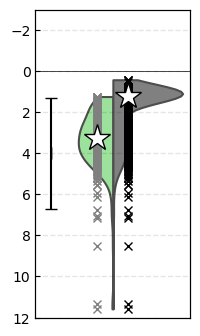

In [25]:

with open(r'../Combo_Amp.pkl', 'rb') as f:
            All_Amp=load(f)
Lassen_Amp=All_Amp.loc[All_Amp['Volcano']=="Lassen"]
Lassen_Amp['Sample_ID_Amp']="Lassen"

with open(r'../Combo_Amp_Filt.pkl', 'rb') as f:
            All_Amp_Filt=load(f)
Lassen_Amp_Filt=All_Amp_Filt.loc[All_Amp_Filt['Volcano']=="Lassen"]
Lassen_Amp_Filt['Sample_ID_Amp']="Lassen"
Lassen_Amp['Class']='Unfilt'
Lassen_Amp_Filt['Class']='filt'

Combo_Amp=pd.concat([Lassen_Amp_Filt, Lassen_Amp], axis=0)

print(sum(Lassen_Amp['P_kbar_calc']>-10))
print(sum(Lassen_Amp_Filt['P_kbar_calc']>-10))

import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()


# ax = sns.violinplot(y=Lassen_Amp['P_Ridolfi21'],
#                 inner=None, cut=0, ax=ax1, color="lightgreen", linewidth=0.5)
sns.violinplot(x="Volcano", y="P_Ridolfi21",  cut=0,  inner=None, hue="Class",
            data=Combo_Amp, split=True, ax=ax1, width=0.9,  palette=['lightgreen', 'grey'],
               stick=True)


ax1.plot(-0.1+0*Lassen_Amp_Filt['P_Ridolfi21'],
  Lassen_Amp_Filt['P_Ridolfi21'],
         'x', mec='grey')
ax1.plot(+0.1+0*Lassen_Amp['P_Ridolfi21'],
  Lassen_Amp['P_Ridolfi21'],
         'x', mec='black')

ax1.plot(-0.1,
  np.nanmedian(Lassen_Amp_Filt['P_Ridolfi21']),
         '*k', mfc='w', ms=20)

ax1.plot(+0.1,
  np.nanmedian(Lassen_Amp['P_Ridolfi21']),
         '*k', mfc='w', ms=20)
ax1.get_legend().remove()
ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.5, 0.5])
ax1.set_xlabel(None)
ax1.set_ylabel(None)

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax2.set_yticks([])
ax1.set_xticks([])
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
ax1.errorbar(-0.4, 4, xerr=0, yerr=2.7,  ecolor='black', elinewidth=1.5, ms=0, capsize=4, mec='k')

fig.savefig('Lassen_Amp.png', dpi=200)

In [ ]:
 np.nanmedian(Lassen_Amp_Filt['P_Ridolfi21'])

3.252853500021073

In [ ]:
 np.nanmedian(Lassen_Amp['P_Ridolfi21'])

1.1953710939882058

## Raw template for geophysics and Exp Pet

In [ ]:
LPs=pd.read_excel(r'../Geophysics_April23.xlsx',sheet_name="LPEarthquakes")
LPs_Lassen=LPs.loc[LPs['Volcano']=="Lassen"]
LPs_Lassen
# Pit reference level for Shasta is around 2-2.5 km. Put as +2 km here too

,Volcano,Latitude,Depth,Depth definition,Reference,Unnamed: 5,Unnamed: 6
0,Lassen,40.654342,18.16,Mean elevation of seismic network (+2km for ML),Pitt et al. 2002,NaN,NaN
1,Lassen,40.654342,12.42,Mean elevation of seismic network (+2km for ML),Pitt et al. 2002,NaN,NaN
2,Lassen,40.654342,17.86,Mean elevation of seismic network (+2km for ML),Pitt et al. 2002,NaN,NaN
3,Lassen,40.654342,26.62,Mean elevation of seismic network (+2km for ML),Pitt et al. 2002,NaN,NaN
4,Lassen,40.654342,14.08,Mean elevation of seismic network (+2km for ML),Pitt et al. 2002,NaN,NaN
5,Lassen,40.654342,18.15,Mean elevation of seismic network (+2km for ML),Pitt et al. 2002,NaN,NaN
6,Lassen,40.654342,18.12,Mean elevation of seismic network (+2km for ML),Pitt et al. 2002,NaN,NaN
7,Lassen,40.654342,16.11,Mean elevation of seismic network (+2km for ML),Pitt et al. 2002,NaN,NaN
8,Lassen,40.654342,17.66,Mean elevation of seismic network (+2km for ML),Pitt et al. 2002,NaN,NaN
9,Lassen,40.654342,19.11,Mean elevation of seismic network (+2km for ML),Pitt et al. 2002,NaN,12.42


## Exp Pet

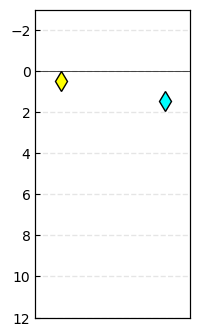

In [ ]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()
# Schwab and Castro (2007) 
ax1.plot(0, 50/100, 'dk', mfc='yellow', ms=10)
# Quinn et al. (2014)
ax1.errorbar(0.8, 145/100, xerr=0, yerr=25/100,
             fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=10, mec='k')

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.set_xlim([-0.2, 1])
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_xticks([ ])
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min]) 
ax2.set_yticks([])
fig.savefig('Lassen_Expet.png', dpi=200, bbox_inches="tight")

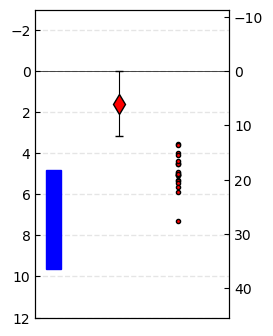

In [ ]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2.5,4), sharey=True)
ax2 = ax1.twinx()
elev=3.189
stat_elev_diff=elev-2.25

# Vague Geophysics
import matplotlib.patches as patches
# Park and Ostos (2013) MT
rect_PO = patches.Rectangle((1.9,15+elev),0.2,15+elev,linewidth=1,
                            edgecolor='blue',facecolor='blue')
ax2.add_patch(rect_PO)

# Benz et al. (1992)
# rect_PO = patches.Rectangle((2.9,0+elev),0.2,15+elev,linewidth=1,
#                             edgecolor='r',facecolor='red')
# ax2.add_patch(rect_PO)

# Taira
ax2.errorbar(2.9, 6,
             xerr=0, yerr=6, fmt='d', ecolor='k', elinewidth=0.8, mfc='red', ms=10, mec='k', capsize=3)

ax2.plot(LPs_Lassen['Depth']*0+3.7, LPs_Lassen['Depth']+stat_elev_diff, 'ok', mfc='red', ms=3)
ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.set_xlim([1.75, 4.4])
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_xticks([])
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
                 
fig.savefig('Lassen_Geophysical+Other.png', dpi=200, bbox_inches="tight")

In [ ]:
## Same for amphibole

Lassen_read_Amp=pt.import_excel('Lassen.xlsx', sheet_name='Amp_All')
Lassen_Input_Amp=Lassen_read_Amp['my_input']
Lassen_Amp=Lassen_read_Amp['Amps']
Lassen_Amp['Sample_ID_Amp']=Lassen_Input_Amp["Stage"]
Lassen_Amp_copy=Lassen_Amp.copy()
Lassen_Amp_comps=pt.get_amp_sites_from_input(amp_comps=Lassen_Amp)
# Are a few outside 3.95 to 4.05 Cat sums, CaCaMgFe lies 0.3 - 0.55
Lassen_Amp_filt1=Lassen_Amp.loc[( (Lassen_Amp_comps['cation_sum_All'].between(15, 16)) )]
Lassen_Amp_class=pt.classify_phases(df=Lassen_Amp_filt1, return_end_members=True,
                        str_to_drop='_Amp')
print(Lassen_Amp_class['Phase_Min_Group_ML'].unique())
Lassen_Amp_filt=Lassen_Amp_filt1.loc[Lassen_Amp_class['Phase_Min_Group_ML']=="Amp"].reset_index(drop=True)
Lassen_Amp_Press_NoFilter=pt.calculate_amp_only_press(amp_comps=Lassen_Amp_filt, 
                        Ridolfi_Filter=False, equationP="P_Ridolfi2021")
Lassen_Amp_Press_Filter=pt.calculate_amp_only_press(amp_comps=Lassen_Amp_filt, 
                        Ridolfi_Filter=True, equationP="P_Ridolfi2021")


C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SVC from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


['Amp' 'Px']


In [ ]:
len(Lassen_Amp_Press_NoFilter)

542

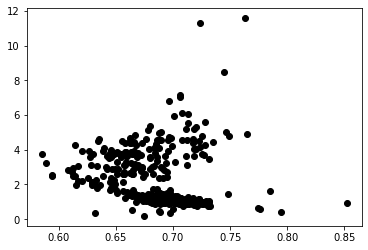

In [ ]:
plt.plot(
         (Lassen_Amp_filt['MgO_Amp']/40.3044)/(Lassen_Amp_filt['MgO_Amp']/40.3044+Lassen_Amp_filt['FeOt_Amp']/71.844),
    Lassen_Amp_Press_NoFilter['P_kbar_calc'], 'ok')

In [ ]:
Amp_Chem=pt.calculate_amp_only_melt_comps(amp_comps=Lassen_Amp_filt)

c:\users\penny\onedrive - oregon state university\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\amphibole.py:229: UserWarning: You must enter a value for T in Kelvin to get results from equation3 and 5 from Zhang, and SiO2 from Putrka (2016)
  w.warn('You must enter a value for T in Kelvin to get results from equation3 and 5 from Zhang, and SiO2 from Putrka (2016)')


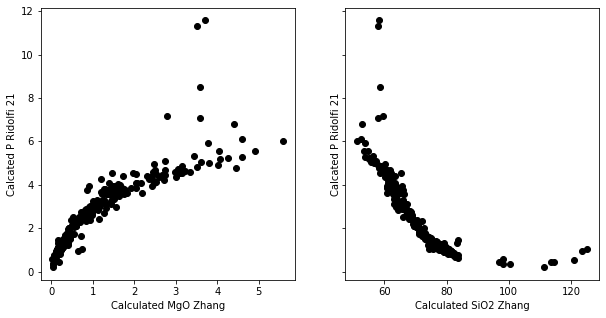

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
ax1.plot(
         Amp_Chem['MgO_Eq9_Zhang17'],
    Lassen_Amp_Press_NoFilter['P_kbar_calc'], 'ok')
ax1.set_xlabel('Calculated MgO Zhang')
ax1.set_ylabel('Calcated P Ridolfi 21')

ax2.set_xlabel('Calculated SiO2 Zhang')
ax2.set_ylabel('Calcated P Ridolfi 21')

ax2.plot(
         Amp_Chem['SiO2_Eq1_Zhang17'],
    Lassen_Amp_Press_NoFilter['P_kbar_calc'], 'ok')

In [ ]:
#None Filtered
Lassen_Amp_Press_All=Lassen_Amp_Press_NoFilter.copy()
Lassen_Amp_Press_All['Preferred_P']=Lassen_Amp_Press_All['P_kbar_calc']
Lassen_Amp_Press_All['Model']="Ridolfi not filtered"
Lassen_Amp_Press_All['Sample_ID_Amp']="Lassen domefield"

Lassen_Amp_Press_Filt=Lassen_Amp_Press_Filter.copy()
Lassen_Amp_Press_Filt['Preferred_P']=Lassen_Amp_Press_Filt['P_kbar_calc']
Lassen_Amp_Press_Filt['Model']="Ridolfi filtered"
Lassen_Amp_Press_Filt['Sample_ID_Amp']="Lassen domefield"

Combo_Amp=pd.concat([Lassen_Amp_Press_All, Lassen_Amp_Press_Filt], axis=0)

In [ ]:
import pickle
Combo_Amp.to_pickle("Amp_Lassen.pkl")

In [ ]:
Lassen_Amp_Press_All['Sample_ID_Amp']

0      Lassen domefield
1      Lassen domefield
2      Lassen domefield
3      Lassen domefield
4      Lassen domefield
             ...       
537    Lassen domefield
538    Lassen domefield
539    Lassen domefield
540    Lassen domefield
541    Lassen domefield
Name: Sample_ID_Amp, Length: 542, dtype: object

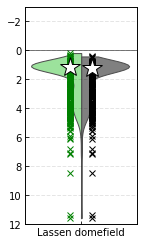

In [ ]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(5*0.4,4), sharey=True)
ax2 = ax1.twinx()

volc_order=["Brokeoff volcano", "Lassen domefield"]
sns.violinplot(x="Sample_ID_Amp", y="Preferred_P",  cut=0, 
               linewidth=1,hue="Model", inner=None,
            data=Combo_Amp, split=True, ax=ax1, width=0.9, order=volc_order, stick=True
              , palette=['lightgreen', 'grey'])

# ax1.plot(-0.1+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="Brokeoff Volcano")],
#       Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="Brokeoff Volcano")],  
#          'xb')

# ax1.plot(0.1+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="Brokeoff Volcano")],
#       Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="Brokeoff Volcano")],  
#          'xr')

# ax1.plot(-0.1,
#       np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="Brokeoff Volcano")]),  
#          '*k', mfc='w', ms=20)

# ax1.plot(0.1,
#       np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="Brokeoff Volcano")]),  
#          '*k', mfc='w', ms=20)

ax1.plot(0.9+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Lassen domefield")],
      Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Lassen domefield")],  
         'x', mec='green')

ax1.plot(1.1+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Lassen domefield")],
      Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Lassen domefield")],  
         'x', mec='k')

ax1.plot(0.9,
      np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Lassen domefield")]),  
         '*k', mfc='w', ms=20)

ax1.plot(1.1,
      np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Lassen domefield")]),  
         '*k', mfc='w', ms=20)

ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([0.5, 1.5])
ax1.get_legend().remove()
ax1.set_xlabel(None)
ax1.set_ylabel(None)

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax2.set_yticks([])
# ax1.set_yticks([])
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)


fig.savefig('Lassen_Amp.png', dpi=200)



In [ ]:
Lassen_Amp_Press_Filter

,P_kbar_calc,Input_Check,Fail Msg,classification,equation,H2O_calc,Fe2O3_calc,FeO_calc,Total_recalc,Sum_input,...,Fe2_calc,"O=F,Cl",Total,Mgno_Fe2,Mgno_FeT,Na_calc,B_Sum,A_Sum,class,APE
0,2.900868,True,,Mg-hastingsite,1b,1.793710,6.749393,6.809810,99.567063,97.222000,...,0.836452,-0.124850,NaN,0.780150,0.652262,0.176295,2.0,0.507183,N/A,25.198228
1,NaN,False,APE >60,Mg-Hornblende,1b,1.753117,5.839672,6.877389,100.417060,98.281000,...,0.826935,-0.202117,NaN,0.801039,0.695338,0.305034,2.0,0.425599,N/A,79.629976
2,1.327280,True,,Mg-Hornblende,1b,1.853930,8.814875,4.703263,100.169790,97.539000,...,0.565812,-0.106279,NaN,0.852358,0.682439,0.273790,2.0,0.216123,N/A,22.617014
3,1.082220,True,,Mg-Hornblende,1b,1.818471,8.855900,4.058348,99.182058,96.610000,...,0.489813,-0.133661,NaN,0.873045,0.698839,0.277309,2.0,0.099969,N/A,4.551413
4,1.019863,True,,Mg-Hornblende,1b,1.846387,6.915142,5.870667,100.207881,97.786000,...,0.704754,-0.117315,NaN,0.826634,0.698318,0.209168,2.0,0.229198,N/A,0.851276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,NaN,False,APE >60,Mg-hastingsite,(1b+1c)/2,1.938056,5.962016,8.048102,99.845332,97.309958,...,0.982593,-0.000000,NaN,0.731218,0.620116,0.350854,2.0,0.519488,N/A,68.136871
538,NaN,False,APE >60,Mg-Hornblende,1b,1.816229,0.000000,11.414100,99.177185,97.360956,...,1.487022,-0.000000,NaN,0.674927,0.674927,-1.054239,2.0,1.160618,N/A,157.614580
539,NaN,False,APE >60,Mg-Hornblende,1b,1.842168,0.000000,10.057200,100.520502,98.678334,...,1.291796,-0.000000,NaN,0.696991,0.696991,-1.031095,2.0,1.254566,N/A,143.776408
540,1.299878,True,,Mg-Hornblende,1b,1.952355,0.656504,11.426669,99.720677,97.702549,...,1.384864,-0.000000,NaN,0.681672,0.670636,0.126441,2.0,0.307086,N/A,40.501437


In [ ]:
plt.plot(1.1,
      np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Lassen domefield")]),  
         '*k', mfc='w', ms=20)

In [ ]:
Combo_Amp["Sample_ID_Amp"]

In [ ]:
Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Lassen domefield")]